In [235]:
import pandas as pd
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import re

%matplotlib inline
import seaborn as sns

In [649]:
survey = pd.read_csv('/home/kamlesh/AnacondaProjects/Dataquest/Data/Guided Project_ Finding the Best Markets to Advertise In/data.csv')

/home/kamlesh/anaconda3/envs/Py35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [650]:
survey.shape

(18175, 136)

Instructions

    Figure out whether the sample we have is representative for our population of interest.
    The JobRoleInterest column describes for every participant the role(s) they'd be interested      
    in working.
    Generate a frequency distribution table for this column. Take percentages instead of 
    absolute frequencies.
    Analyze the table.
        Are people interested in only one subject or they can be interested in more than one subject?
        If most people are interested in more than one subject, is this sample still representative?
        The focus of our courses is on web and mobile development. How many people are interested in 
        at least one of these two subjects?
        Generate at least one graph while you're working on these steps to help the reader understand
        easier what you're doing.
        Use Markdown cells to explain the readers what you're doing.


In [247]:
survey.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [365]:
survey['JobRoleInterest'].describe()

count                         6992
unique                        3213
top       Full-Stack Web Developer
freq                           823
Name: JobRoleInterest, dtype: object

In [401]:
#Removing null values
survey_na_removed = pd.DataFrame(survey['JobRoleInterest'].dropna())
survey_na_removed.head()


,JobRoleInterest
1,Full-Stack Web Developer
2,"Front-End Web Developer, Back-End Web Develo..."
3,"Front-End Web Developer, Full-Stack Web Deve..."
4,"Full-Stack Web Developer, Information Security..."
6,Full-Stack Web Developer


In [402]:
def clean_JobRoleInterest(sent):
    string = str(sent)
    string = string.strip()
    string = string.lower()
    while '  ' in string:
        string = string.replace('  ', '')    
    
    #tokens = string.split(',')
    # to remove the in sentences space/tab the string has been split
    #myString = ",".join(tokens )
    #print (string)
    return string    

              
survey_clean =pd.DataFrame(survey_na_removed['JobRoleInterest'].apply(lambda x: clean_JobRoleInterest(x)))

survey_clean.head()

,JobRoleInterest
1,full-stack web developer
2,"front-end web developer, back-end web develope..."
3,"front-end web developer, full-stack web develo..."
4,"full-stack web developer, information security..."
6,full-stack web developer


In [410]:
JobRole = pd.DataFrame(survey_clean['JobRoleInterest'].value_counts(normalize=True)*100)
JobRole.head()

,JobRoleInterest
full-stack web developer,11.770595
front-end web developer,6.435927
data scientist,2.173913
back-end web developer,2.030892
mobile developer,1.673341


In [411]:
# below we are resetting the index,so index will be added as an column and 
# Renaming of the column names
JobRole =JobRole.reset_index()
JobRole =JobRole.rename( index= str,columns={"index":"Role","JobRoleInterest":"Role%"})
JobRole.head(10)

,Role,Role%
0,full-stack web developer,11.770595
1,front-end web developer,6.435927
2,data scientist,2.173913
3,back-end web developer,2.030892
4,mobile developer,1.673341
5,game developer,1.630435
6,information security,1.315789
7,"full-stack web developer, front-end web developer",0.915332
8,"front-end web developer, full-stack web developer",0.800915
9,product manager,0.786613


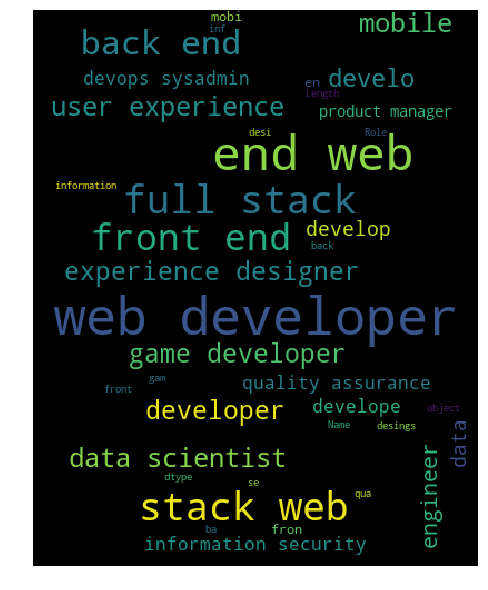

In [412]:
# Creating a world cloud 
# Libraries for the word clouds
from wordcloud import WordCloud,STOPWORDS
import re

stopwords = set(STOPWORDS)
wordcloud = WordCloud(height = 500,
                     width = 400,
                     background_color ='black').generate_from_text(str(JobRole['Role']))
        
#wordcloud.generate_from_text(text)

# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)


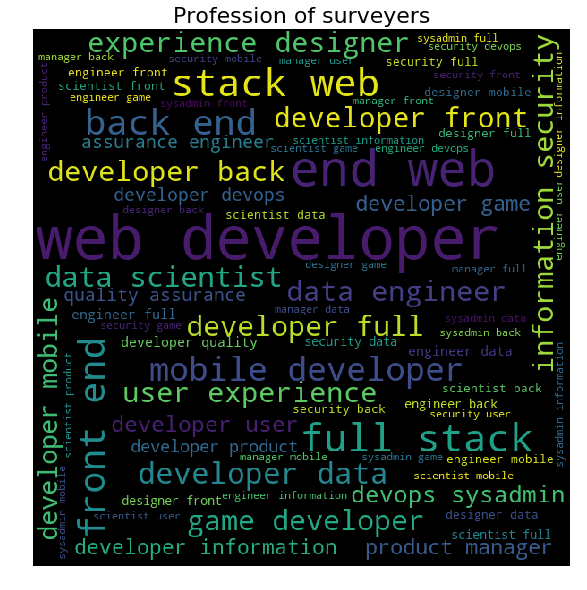

In [414]:
# Word cloud with prprocessing of text

# text_1 string collection involves simple steps
text_1= str()
text_1 = ",".join(review for review in JobRole.Role)
#https://docs.python.org/3/library/stdtypes.html#str.join
#Note - The "," is inserted between each element of the given list. 

#second string is provide by the method as a list 
text_2 =[]
def get_roles(sent):
    string = str(sent)
    string = string.strip()
    string = string.replace("\t",'')
    
    string = re.sub("^\s+|\s+$", "", string, flags=re.UNICODE)
    # split the value
    tokens = string.split(',')
    
    # Converts each token into lowercase
    for i in range(len(tokens)):
        if tokens[i].lower() not in text:    
            text.append(tokens[i].lower())
            
    # Now creating the world cloud 
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(height = 600,
                      width = 600,
                      relative_scaling = 0.5,
                      background_color ='black',
                      max_words = 75,
                      min_font_size = 1,
                      #max_font_size = 50
                      ).generate_from_text(str(text_1))
    
    # plot the WordCloud image  
    title ='Profession of surveyers'
    fig =plt.figure(figsize = (8, 8), facecolor = None)
    plt.title(s = title,fontdict ={'fontsize': 22,
                                   #'fontweight' : rcParams['axes.titleweight'],
                                    'verticalalignment': 'baseline',
                                    'horizontalalignment': 'center'})
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
              
 
get_roles(JobRole['Role'])


In [425]:
#?WordCloud
#dir(WordCloud)


The focus of our courses is on web and mobile development. How many people are interested in at least one of these two subjects?

In [430]:
# making a copy of the df
Role_df = survey_clean

# below lines reindex the df and inplace is true so that there is no need for assignment 
Role_df.reset_index(drop=True,inplace = True)

In [431]:
Role_df.head()
# you can check the size of the df

,JobRoleInterest
0,full-stack web developer
1,"front-end web developer, back-end web develope..."
2,"front-end web developer, full-stack web develo..."
3,"full-stack web developer, information security..."
4,full-stack web developer


In [448]:
web_or_mobile =Role_df['JobRoleInterest'].str.contains( 'web developer'
                                                        or'web'
                                                        or 'mobile development'
                                                        or 'mobile developer'
                                                        or 'mobile')


web_or_mobile_ft = web_or_mobile.value_counts(normalize=True)* 100

In [449]:
web_or_mobile_ft

True     82.622998
False    17.377002
Name: JobRoleInterest, dtype: float64

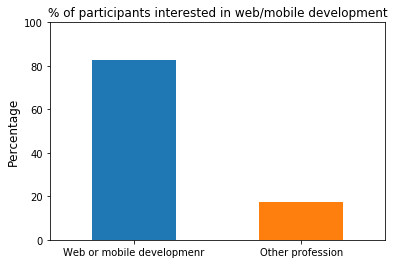

In [507]:
web_or_mobile_ft.plot.bar()
plt.title('% of participants interested in web/mobile development')

plt.ylabel('Percentage', fontsize = 12)
plt.xticks([0,1],['Web or mobile developmenr', 'Other profession'],rotation = 0)
plt.ylim([0,100])
plt.show()

### 2nd task

Generate a frequency table for the CountryLive variable.

    Generate both absolute and relative frequencies.
    Analyze the results.
    Based on the results, what are the two markets you'd choose for advertisement?
    Can we stop the analysis here, or we need to go more in depth?


In [805]:
country_live = survey[survey['CountryLive'].notnull()].copy()
country_live.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [806]:
absolute_frequencies = country_live['CountryLive'].value_counts()
relative_frequencies = country_live['CountryLive'].value_counts(normalize = True) * 100

country_live_stats = pd.DataFrame(data = {'Absolute frequency': absolute_frequencies, 
                     'Percentage': relative_frequencies})

In [807]:
country_live_stats.head()

,Absolute frequency,Percentage
United States of America,5791,37.760824
India,1400,9.128847
United Kingdom,757,4.936098
Canada,616,4.016693
Brazil,364,2.373500


United States and India seems to be good markets

    Create a new column that describes the amount of money a student has spent per month (at the moment 
    they completed the survey).
        You'll need to divide the MoneyForLearning column to the MonthsProgramming column.
        Some students answered that they had been learning to code for 0 months (it might be that they    
        had just started when they completed the survey). To avoid dividing by 0, replace all the values
        of 0 with 1.

    Find out how many null values there are in the new column (the column describing the amount of money
    students spend per month).
    Keep only the rows that don't have a null value for the new column.
    Remove also any rows that have null values in the CountryLive column.
    Group the remaining data by the CountryLive column and find out how much money a student spends on 
    average each month in the US, India, the United Kingdom and Canada.
        You can use the DataFrame.groupby() method.
        As a summary metric, we recommend choosing the mean to take into account all values in the 
        distributions. You can also compute the median or the mode to see how they compare with the mean.
        Analyze the results. Is there anything in the results that looks off?


In [808]:
def remove_m_0(val):
    if type(val) == float:
        if val == 0:
            val = 1
    return val        

country_live = country_live[country_live['MonthsProgramming'].notnull()]
country_live = country_live[country_live['MoneyForLearning'].notnull()]

country_live['MonthsProgramming'] = country_live['MonthsProgramming'].apply(lambda x: remove_m_0(x))
print(country_live['MonthsProgramming'].isnull().sum())
#below direct pandas method for replacing month = 0
#country_live['MonthsProgramming'].replace(to_replace=0, value=1, inplace=True)

country_live['money_per_month'] = country_live['MoneyForLearning'] / country_live['MonthsProgramming']
print(country_live['money_per_month'].isnull().sum())

0
0


In [809]:
country_live = country_live[country_live['CountryLive'].notnull()]

print(country_live['money_per_month'].isnull().sum())
country_live_group=country_live.groupby(by =country_live['CountryLive']).mean()

0


In [810]:
country_live_group.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampRecommend,ChildrenNumber,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
CountryLive,,,,,,,,,,,,,,,,,,,,,
Afghanistan,20.333333,0.166667,0.0,0.0,1.0,NaN,1.0,NaN,1.0,NaN,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,8.333333
Albania,23.250000,0.000000,NaN,NaN,NaN,3.0,1.0,NaN,1.0,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,14.609871
Algeria,23.466667,0.000000,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,2.987654
Angola,24.800000,0.000000,NaN,NaN,NaN,2.5,1.0,NaN,1.0,1.0,...,1.0,NaN,1.0,1.0,NaN,1.0,1.0,NaN,NaN,70.000000
Anguilla,25.000000,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1.0,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [811]:
country_live_group['money_per_month'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    206.297711
India                        66.526198
United Kingdom               55.774980
Canada                      118.434054
Name: money_per_month, dtype: float64

As we can see that the money spend, per month by the countries UK and Canada is low.

### Check for outliners for the above data 

In [812]:
con_list = ['United States of America','India', 'United Kingdom','Canada']
#create an empty data set  
cols = country_live.columns.tolist()

con_4 = pd.DataFrame(columns = cols)
temp_df = pd.DataFrame(columns= cols)

for c in con_list:
    temp_df = country_live[ country_live['CountryLive'] == c]
    con_4 =con_4.append(temp_df)


    

In [813]:
# Isolate only the countries of interest
only_4 = country_live[country_live['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]

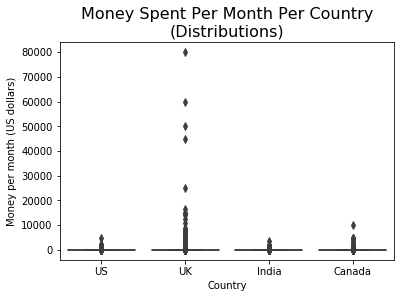

In [814]:
sns.boxplot(y = 'money_per_month', x = 'CountryLive',data = only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)', fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

Observation - Uk seems to  have some outlier

In [815]:
country_live = country_live[ country_live['money_per_month'] < 20000]

In [816]:
# Recompute mean sum of money spent by students each month
countries_mean = country_live.groupby('CountryLive').mean()
countries_mean['money_per_month'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    158.919644
India                        66.526198
United Kingdom               55.774980
Canada                      118.434054
Name: money_per_month, dtype: float64

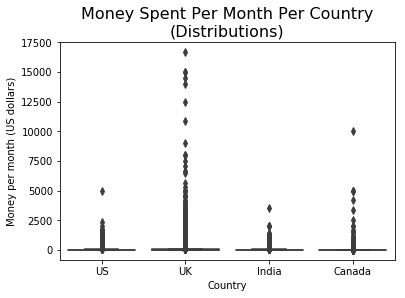

In [817]:
# Isolate only the countries of interest
only_4 = country_live[country_live['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]
sns.boxplot(y = 'money_per_month', x = 'CountryLive',data = only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)', fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()


### Instructions
Recompute the mean values, just like we did in the previous screen: group the data by the CountryLive column, and then find out how much money a student spends on average each month in the US, India, the United Kingdom and Canada.

    If the mean values still look off, look more for extreme outliers. For instance, you can find a couple of persons in India who spend $5000 per month. Isolate these respondents and examine their answers to other questions in the survey to figure out whether these big expenses with learning are justified — you can try to find out whether they attended any bootcamp, which might justify the large amount of money spent.

In [818]:
# Inspect the extreme outliers for India
india_outliers = only_4[(only_4['CountryLive'] == 'India') & 
                        (only_4['money_per_month'] >= 2500)]
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333
2044,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2500.000000
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5000.000000
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,4166.666667




It seems that neither participant attended a bootcamp. Overall, it's really hard to figure out from the data whether these persons really spent that much money with learning. The actual question of the survey was "Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars)?", so they might have misunderstood and thought university tuition is included. It seems safer to remove these two rows

In [819]:
# Remove the outliers for India
only_4 = only_4.drop(india_outliers.index) # using the row labels

In [820]:
# Examine the extreme outliers for the US
us_outliers = only_4[
    (only_4['CountryLive'] == 'United States of America') & 
    (only_4['money_per_month'] >= 6000)]

us_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.000000
2404,22.0,1.0,1.0,1.0,Telegraph Academy,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,7083.333333
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.000000
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,10833.333333
5695,27.0,1.0,0.0,0.0,General Assembly,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14500.000000
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,14000.000000
7505,26.0,1.0,0.0,1.0,Codeup,0.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6666.666667
9778,33.0,1.0,0.0,1.0,Grand Circus,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000


Out of these 14 extreme outliers, 8 people attended bootcamps, which justify the large sums of money spent on learning. For the other five, it's hard to figure out from the data where they could have spent that much money on learning. Consequently, we'll remove those rows where participants reported thay they spend \$6000 each month, but they have never attended a bootcamp.

Also, the data shows that eight respondents had been programming for no more than three months when they completed the survey. They most likely paid a large sum of money for a bootcamp that was going to last for several months, so the amount of money spent per month is unrealistic and should be significantly lower (because they probably didn't spend anything for the next couple of months after the survey). As a consequence, we'll remove every these eight outliers.

In the next code block, we'll remove respondents that:

    Didn't attend bootcamps.
    Had been programming for three months or less when at the time they completed the survey

In [822]:


# Remove the respondents who didn't attendent a bootcamp
no_bootcamp = only_4[
    (only_4['CountryLive'] == 'United States of America') & 
    (only_4['money_per_month'] >= 6000) &
    (only_4['AttendedBootcamp'] == 0)
]

only_4 = only_4.drop(no_bootcamp.index)


# Remove the respondents that had been programming for less than 3 months
less_than_3_months = only_4[
    (only_4['CountryLive'] == 'United States of America') & 
    (only_4['money_per_month'] >= 6000) &
    (only_4['MonthsProgramming'] <= 3)
]

only_4 = only_4.drop(less_than_3_months.index)



In [823]:
# Examine the extreme outliers for Canada
canada_outliers = only_4[
    (only_4['CountryLive'] == 'Canada') & 
    (only_4['money_per_month'] > 4500)]

canada_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0




Here, the situation is similar to some of the US respondents — this participant had been programming for no more than two months when he completed the survey. He seems to have paid a large sum of money in the beginning to enroll in a bootcamp, and then he probably didn't spend anything for the next couple of months after the survey. We'll take the same approach here as for the US and remove this outlier.


In [824]:
# Remove the extreme outliers for Canada
only_4 = only_4.drop(canada_outliers.index)

In [825]:


# Recompute mean sum of money spent by students each month
only_4.groupby('CountryLive').mean()['money_per_month']



CountryLive
Canada                      109.973801
India                        38.079479
United Kingdom               55.774980
United States of America    132.860464
Name: money_per_month, dtype: float64

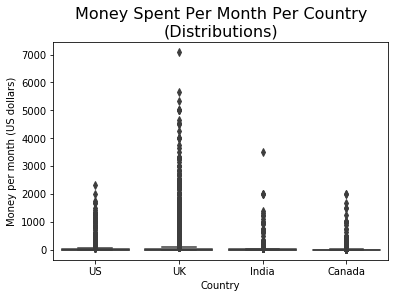

In [826]:
# Visualize the distributions again
sns.boxplot(y = 'money_per_month', x = 'CountryLive',
            data = only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
          fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

### Choosing the Two Best Markets

Obviously, one country we should advertise in is the US. Lots of new coders live there and they are willing to pay a good amount of money each month (roughly \$143).

We sell subscriptions at a price of \$59 per month, and Canada seems to be the best second choice because people there are willing to pay roughly \$93 per month, compared to India (\$66) and the United Kingdom (\$45).

The data suggests strongly that we shouldn't advertise in the UK, but let's take a second look at India before deciding to choose Canada as our second best choice:

    $59 doesn't seem like an expensive sum for people in India since they spend on average \$66 each month.
    We have almost twice as more potential customers in India than we have in Canada:



In [827]:


# Frequency table for the 'CountryLive' column
only_4['CountryLive'].value_counts(normalize = True) * 100



United States of America    68.660287
India                       15.285822
United Kingdom               8.788718
Canada                       7.265173
Name: CountryLive, dtype: float64



In this project, we analyzed survey data from new coders to find the best two markets to advertise in. The only solid conclusion we reached is that the US would be a good market to advertise in.

For the second best market, it wasn't clear-cut what to choose between India and Canada. We decided to send the results to the marketing team so they can use their domain knowledge to take the best decision